In [1]:
# Install pytorch
#https://pytorch.org/get-started/locally/
# Install easyocr 
!pip install easyocr

     |████████████████████████████████| 70.8 MB 11 kB/s 
     |████████████████████████████████| 47.6 MB 1.4 MB/s 


In [2]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [10]:
IMAGE_PATH = 'img.jpg'
#IMAGE_PATH = 'sign.jpg'
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[354, 98], [652, 98], [652, 154], [354, 154]],
  'LEARNING',
  0.9831208796748132),
 ([[226, 228], [456, 228], [456, 276], [226, 276]],
  'LEARNING',
  0.6512311686978326),
 ([[567, 235], [757, 235], [757, 273], [567, 273]],
  'LEARNING',
  0.9385426611011746)]

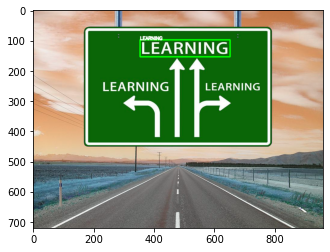

In [11]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

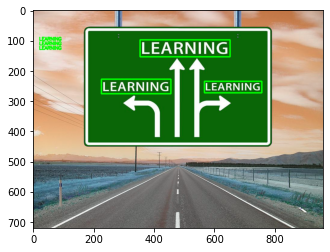

In [12]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()